# Exploratory Data Analysis of Survey Results

(Add description here)

[Factors of Academic Success Survey](https://forms.gle/vJcqWct3swRasCbAA "Link to Google Forms")


#### The two demographics that were surveyed:
- A Drum Corps Facebook Page
- People and friends who follow me on my social media accounts

#### Questions to be answered:
- What is the best way to define someone as "smart"? (likely subjective)
- Does SAT score correlate with high school or college GPA?
- Are band nerds smarter that non-band nerds?
- Which self-improvement methods are most frequent amoung smart people?
- Does drinking either energy drinks or coffee result in higher grades?
- What seperates awkward/anxious people from non-awkward/anxious people?
- Are there correlations between specific big five personality traits and Myers-Briggs types?

## Importing libraries and survey results

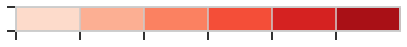

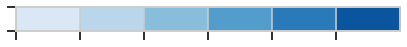

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns

# My Modules
from display_columns import split_dataframe as splitdf
from cleaning import make_dummies, combine_duplicate_columns, get_avg_i_scores, time_to_datetime

# Pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Matplotlib
rcParams.update({'figure.autolayout': True})
#rcParams['font.family'] = "serif"
#rcParams['font.serif'] = ['Georgia']
figsize=(10,6)
plt.style.use('seaborn-whitegrid')
#print(plt.style.available)
#%matplotlib notebook
%matplotlib inline

# Seaborn
sns.set_context('talk')
#sns.set(style="whitegrid") # <-- also affects matplotlib plots, cancels plt.style.use()
sns.palplot(sns.color_palette("Reds"))
sns.palplot(sns.color_palette("Blues"))

#### Read survey spreadsheets

In [2]:
surveydata = pd.read_csv("surveydata.csv")
surveydata.set_index("timestamp", inplace=True)

<hr>

# 1: Introduction to the survey results

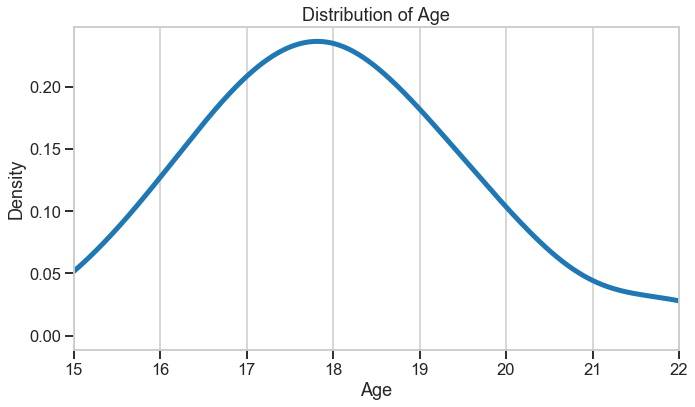

In [3]:
ax = surveydata.age.plot.kde(linewidth=5, figsize=figsize)
ax.set_title("Distribution of Age")
ax.set_xlabel("Age")
ax.set_xlim(surveydata.age.min(),surveydata.age.max())
plt.grid(axis="y")
plt.savefig('Graphs/AgeDistribution.png')

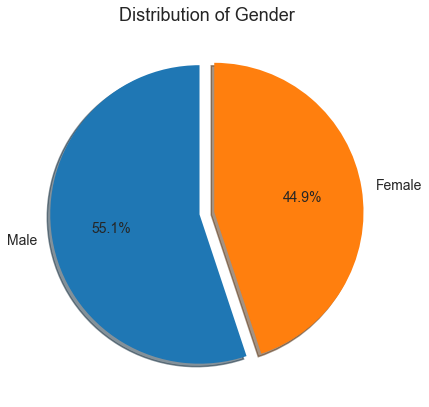

In [4]:
fig, ax = plt.subplots(figsize=figsize)
data = surveydata.gender.value_counts()
ax.pie(data.values, explode=(0.05,0.05),
       labels=data.index, autopct='%1.1f%%',
       shadow=True, startangle=90, textprops={'fontsize': 14})
ax.set_title("Distribution of Gender")
plt.savefig('Graphs/GenderDistribution.png')

In [5]:
surveydata.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49 entries, 2020-02-19 11:20:32.365 to 2020-03-05 20:08:58.881
Data columns (total 55 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   survey_loc                       49 non-null     object 
 1   age                              49 non-null     float64
 2   gender                           49 non-null     object 
 3   major                            48 non-null     object 
 4   major_cat                        49 non-null     object 
 5   school                           47 non-null     object 
 6   school_year                      46 non-null     object 
 7   hs_gpa                           49 non-null     float64
 8   college_gpa                      32 non-null     float64
 9   sat                              39 non-null     float64
 10  converted_sat                    43 non-null     float64
 11  act                              15 non-null    

#### Schema for select non-obvious columns:
| Column Name   | Type | Short Description |
|: -------------|:---|:-------------| 
|`converted_sat`|float64|Found by converting the ACT score to a SAT score, then finding the highest between the two scores|
|`music_genre` |string|Respondent's favorite music genre|
|`chosen_music_artists`|list|Respondent's favorite music artists chosen from a predefined list|
|`share_posts_often` |float64|Whether the respondent posts lots of non-original content on their social media| 
|`routine`     |float64|Whether the respondent follows a morning routine|
|`show_up_early`|float64|Whether the respondent isn't usually late to classes and events|
|`planner`|float64|Whether the respondent keeps a planner for things like time management, personal development/goals, and idea/project notes|

In [6]:
surveydata[25:].head()

,survey_loc,age,gender,major,major_cat,school,school_year,hs_gpa,college_gpa,sat,converted_sat,act,iq,music_genre,fav_music_artists,chosen_music_artists,fav_color,fav_comp_color,go_to_bed,avg_sleep_hours,up_from_bed,openness,conscientiousness,extraversion,agreeableness,neuroticism,myers_briggs,social_awkward,social_anxious,show_up_early,cluttered,share_posts_often,num_hobbies,religion,depressed,routine,exercise,diet,limits_social_media,planner,energy_drinks,meditation,cold_showers,coffee,drum_corps,plays_sports,nature_hobby,school_band,indoor_drumline,rick_and_morty,bojack_horseman,blade_runner_(1982),ferris_bueller's_day_off_(1986),catch-22_by_joseph_heller,stranger_things
timestamp,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-02-20 09:18:45.734,Implying Dum corps: electric boogaloo,18.0,Female,Economics,Math,Dual Enrolled,Senior,4.37,3.81,1380.0,1380.0,NaN,NaN,Country,"Old dominion, lady Gaga, Taylor Swift, emblem ...","Beyoncé, Justin Timberlake, Maroon 5, Rex Oran...",Pink,Yellow,22:00:00,10.0,08:00:00,4.0,2.0,4.0,3.0,1.0,NaN,0.0,0.0,1.0,1.0,0.0,NaN,NaN,NaN,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,NaN,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0
2020-02-21 15:55:17.100,Implying Dum corps: electric boogaloo,16.0,Female,Biomedical engineering,Medical,High School,NaN,4.52,NaN,1280.0,1280.0,NaN,NaN,Jazz,NaN,"Beyoncé, Maroon 5, Pink Floyd, Chicago, Radioh...",Turquoise,Silver,23:00:00,7.5,06:30:00,5.0,3.0,3.0,5.0,2.0,INFP,1.0,1.0,1.0,1.0,0.0,NaN,NaN,NaN,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,NaN,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0
2020-03-04 11:49:53.327,Other,18.0,Male,Data Science,Science,University,Freshman,3.50,3.75,1350.0,1350.0,NaN,NaN,Synthwave,NaN,NaN,NaN,NaN,22:00:00,8.0,06:00:00,4.0,4.0,1.0,5.0,4.0,INFJ,1.0,0.0,0.0,1.0,0.0,5.0,Nonreligious,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0
2020-03-04 12:18:13.644,Dennis Farmer's Instagram,17.0,Female,Pharmacy,Medical,Dual Enrolled,Junior,4.00,4.00,NaN,NaN,NaN,NaN,Classic Rock,"The Beatles, Incubus, Stone Temple Pilots, The...",NaN,Blue,Purple,00:00:00,9.0,09:00:00,4.0,4.0,1.0,3.0,4.0,INTP,1.0,1.0,1.0,0.0,0.0,3.0,Nonreligious,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0
2020-03-04 12:29:05.543,Dennis Farmer's Snapchat,18.0,Female,Animal Science,Science,University,Freshman,3.77,3.50,1380.0,1400.0,31.0,NaN,Indie/Lo-fi,"The 1975, LANY, COIN, Lauv, Tennyson",NaN,Red,White,23:00:00,10.0,09:00:00,2.0,4.0,3.0,2.0,4.0,ISFJ,0.0,1.0,1.0,1.0,0.0,4.0,Nonreligious,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0


## Initial Observations
The people who responded were all students between the ages of 15 and 22, which was to be expected considering the topic of the survey. A notable finding is that a majority of the people who bothered to click on my survey are already on the upper-end of academic success (judging from the grades columns). The next time I do a project like this, I plan to improve my methods for survey sampling to get a wider assortment of demographics. However, these results will work fine for our purposes.

As you can see, there are a total of 55 columns to sort through. To make this easier to work with, we're going to separate the columns into four seperate categories, being Academic Information, Personal Interests, Self Improvement, and Personality Questions. From there, we can analyze each individual category and use our findings to answer the questions found at the beginning of this notebook.

#### Creating categories of columns

In [7]:
surveydata.columns

Index(['survey_loc', 'age', 'gender', 'major', 'major_cat', 'school',
       'school_year', 'hs_gpa', 'college_gpa', 'sat', 'converted_sat', 'act',
       'iq', 'music_genre', 'fav_music_artists', 'chosen_music_artists',
       'fav_color', 'fav_comp_color', 'go_to_bed', 'avg_sleep_hours',
       'up_from_bed', 'openness', 'conscientiousness', 'extraversion',
       'agreeableness', 'neuroticism', 'myers_briggs', 'social_awkward',
       'social_anxious', 'show_up_early', 'cluttered', 'share_posts_often',
       'num_hobbies', 'religion', 'depressed', 'routine', 'exercise', 'diet',
       'limits_social_media', 'planner', 'energy_drinks', 'meditation',
       'cold_showers', 'coffee', 'drum_corps', 'plays_sports', 'nature_hobby',
       'school_band', 'indoor_drumline', 'rick_and_morty', 'bojack_horseman',
       'blade_runner_(1982)', 'ferris_bueller's_day_off_(1986)',
       'catch-22_by_joseph_heller', 'stranger_things'],
      dtype='object')

In [8]:
academics = ['major', 'major_cat', 'school', 'school_year', 
             'hs_gpa', 'college_gpa', 'sat', 'converted_sat', 'act', 'iq']

interests = [['num_hobbies', 'music_genre', 'fav_music_artists', 'chosen_music_artists', 'fav_color', 'fav_comp_color',  
              'drum_corps', 'indoor_drumline', 'plays_sports', 'nature_hobby', 'school_band', 'religion'],
             ['rick_and_morty', 'bojack_horseman', 'blade_runner_(1982)', 
              "ferris_bueller's_day_off_(1986)", 'catch-22_by_joseph_heller', 'stranger_things']]

improvement = ['go_to_bed', 'avg_sleep_hours', 'up_from_bed', 'routine', 'exercise', 'diet', 
               'limits_social_media', 'planner', 'energy_drinks', 'meditation', 'cold_showers', 'coffee']

personality = [['openness', 'conscientiousness', 'extraversion', 'agreeableness', 'neuroticism', 'myers_briggs'],
               ['social_awkward', 'social_anxious', 'show_up_early', 'cluttered', 
                'share_posts_often', 'depressed']]

In [9]:
# Checking that I didn't miss any columns
print("Total number of columns:", surveydata.shape[1])
print("\nExcluding 'survey_loc', 'age', and 'gender'")
print("\nNumber of columns in categories dictionary:", len(academics) + len(interests[0]) + len(interests[1]) + len(improvement) + len(personality[0]) + len(personality[1]))

Total number of columns: 55

Excluding 'survey_loc', 'age', and 'gender'

Number of columns in categories dictionary: 52


# 2. Academic Information

In [10]:
#fig, ax = plt.subplots()
#ax = surveydata.college_gpa.plot.kde(linewidth=5)

#ax.plot
#plt.plot(surveydata.hs_gpa, surveydata.college_gpa, kind="kde")
#plt.title("Distribution of College Grades")
#plt.xlabel("Grade Point Average")
#ax.set_xlim(surveydata.college_gpa.min(),surveydata.college_gpa.max())
#plt.grid(axis="y")
#plt.savefig('Graphs/college.png')

#plt.show()

In [11]:
surveydata[academics].sample(n=10, random_state=2)

,major,major_cat,school,school_year,hs_gpa,college_gpa,sat,converted_sat,act,iq
timestamp,,,,,,,,,,
2020-02-20 07:36:50.548,childhood education,Fine Arts,University,Sophomore,4.20,2.00,1190.0,1190.0,NaN,NaN
2020-02-19 14:18:40.425,Biology,Science,High School,Junior,3.95,NaN,1400.0,1400.0,NaN,NaN
2020-03-04 18:55:20.028,Medicine,Medical,High School,Sophomore,3.74,NaN,NaN,NaN,NaN,NaN
2020-02-19 16:12:15.470,Kinesiology,Science,University,Senior,3.90,3.20,1500.0,1500.0,NaN,150.0
2020-03-04 14:09:54.186,Fine arts//photography,Fine Arts,High School,Junior,3.14,NaN,1010.0,1010.0,NaN,NaN
2020-03-05 14:13:34.233,Computers,Technology,Dual Enrolled,Junior,3.90,NaN,NaN,NaN,NaN,NaN
2020-03-05 14:50:04.324,Engineering,Engineering,University,Sophomore,3.40,3.50,1100.0,1100.0,NaN,NaN
2020-02-19 14:49:43.453,Computer Science,Science,High School,Senior,3.10,NaN,1110.0,1110.0,NaN,NaN
2020-02-19 15:15:43.426,Agricultural Education,Science,University,Freshman,3.69,3.60,1260.0,1340.0,29.0,NaN


As the basis for the majority of this project, the academics section of the results contains useful information about each students grades and education status. Although not many people answered the "What is your IQ?" question, we do have plenty of quantitative data to work with in the form of `hs_gpa`, `college_gpa`, and `converted_sat`.

It is common knowledge that being good at school does not necessarily mean that you are a smart individual. <strike>Because I myself am a student, I am going to pretend this fact does not exist.</strike> At the same time, it is very difficult to determine real intelligence from a three minute survey. Therefore, we will consider intelligence and level of academic success as being the same.

## Intelligence Score
To create a more concise method for determining academic success, we will formulate an "Intelligence Score" for each participant, which will take a weighted average of the `hs_gpa`, `college_gpa`, and `converted_sat` columns compared with the average value for each respective column.

To calculate weights for `hs_gpa`, `college_gpa`, and `converted_sat`, we can incorporate the statistical mean for each value. Since the `college_gpa` mean score is lower than the `hs_gpa` mean grade, we can conclude that getting a high GPA in college is more challenging than getting a high GPA in high school. Therefore, each score in the calculation should be weighed based on its relative difficulty, as seen in the table below:


|Column|Mean|Mean / 400|Calculation|Weight|
|:-----|---:|---------:|----------:|-----:|
|`hs_gpa`|3.655||4 - Mean|0.344|
|`college_gpa`|3.403||4 - Mean|0.596|
|`converted_sat`|1294|3.235|4 - (Mean / 400)|0.764|


If a number is missing, we can insert the average score for that value, then reweigh the missing column. If an  existing score is higher than its average, the percentage difference will be subtracted from the inserted value's weight. Likewise, if a student is below average in a specific score, the inserted value's weight will increase.

```python
for student_score in [existing_scores]:
    deltaweight = (student_score / average_score) - 1
    missing_value_weight = missing_value_weight - deltaweight
```

After all of the weights are adjusted for missing values, we will then apply the weights to each of the student's scores, then use the weighted mean formula to calculate an intelligence score.
```python
scores  = [a, b, c]
weights = [x, y, z]

weighted_scores    = [ax,  by,  cz]
intelligence_score = (ax + by + cz) / (x + y + z)
```

In [12]:
def calc_intelligence(grades:"[floatHs, floatCollege, floatSat]", avgs:"[floatHs, floatCollege, floatSat]"):
    """
    Reduces a student's hard work throughout all of 
    high school and university down to a single number.
    """
    weights = [4-avgs[0], 4-avgs[1], 4-(avgs[2]/400)]
    
    ### Correct for missing values:
    # Stores the index of missing values, with non-missing values being recorded as '-1'
    missing_index = [i if pd.isnull(grades[i]) else -1 for i in range(3)]
    for missing in missing_index:
        if missing == -1:
            continue
            # ^ if a score is not missing, continue to the next score
            
        # Insert the average grade to replace the missing value
        grades[missing] = avgs[missing]
        
        # Adjust weight for missing value based on if each non-missing
        # value is greater or less than its corresponding mean
        for notmiss in range(3):
            if missing_index[notmiss] == -1:
                weights[missing] -= (grades[notmiss] / avgs[notmiss]) - 1
        
        if weights[missing] < 0:
            weights[missing] = 0
    
    # Convert SAT score to be out of 4 (instead of 1600)
    grades[2] /= 400
    
    # Apply corresponding weights to each grade
    weighted_grades = [grades[i] * weights[i] for i in range(3)] 
    
    # Calculate intelligence score using weighted mean formula
    intelligence_score = sum(weighted_grades) / sum(weights)
    return intelligence_score

In [13]:
print("HS: 4.00 | College: 3.75 | SAT: 1400")
print("I =", round(calc_intelligence([4, 3.5, 1400],[surveydata.hs_gpa.mean(), surveydata.college_gpa.mean(), surveydata.converted_sat.mean()]), 2), "\n")
print("HS: 3.75 | College: 4.00 | SAT: 1400")
print("I =", round(calc_intelligence([3.5, 4, 1400],[surveydata.hs_gpa.mean(), surveydata.college_gpa.mean(), surveydata.converted_sat.mean()]), 2))

HS: 4.00 | College: 3.75 | SAT: 1400
I = 3.6 

HS: 3.75 | College: 4.00 | SAT: 1400
I = 3.67


In [14]:
surveydata[["hs_gpa", "college_gpa", "converted_sat"]].head().values

array([[   3.34,    3.84, 1050.  ],
       [   3.5 ,    3.1 , 1400.  ],
       [   4.  ,    3.9 , 1370.  ],
       [   3.98,    3.78, 1460.  ],
       [   3.87,    3.84, 1500.  ]])

In [15]:
averages = [surveydata.hs_gpa.mean(), surveydata.college_gpa.mean(), surveydata.converted_sat.mean()]

i_scores = [calc_intelligence(listGrades, averages) 
            for listGrades in surveydata[["hs_gpa", "college_gpa", "converted_sat"]].values]

surveydata.insert(14, "i_score", i_scores)

In [16]:
surveydata[["hs_gpa", "college_gpa", "converted_sat", "i_score"]].head()

,hs_gpa,college_gpa,converted_sat,i_score
timestamp,,,,
2020-02-19 11:20:32.365,3.34,3.84,1050.0,3.194316
2020-02-19 11:22:18.391,3.50,3.10,1400.0,3.360108
2020-02-19 11:22:22.283,4.00,3.90,1370.0,3.707242
2020-02-19 11:24:48.272,3.98,3.78,1460.0,3.762108
2020-02-19 11:36:03.104,3.87,3.84,1500.0,3.805710


In [17]:
surveydata["i_score"].describe()

count    49.000000
mean      3.395782
std       0.276234
min       2.766336
25%       3.194316
50%       3.415276
75%       3.594492
max       3.822236
Name: i_score, dtype: float64

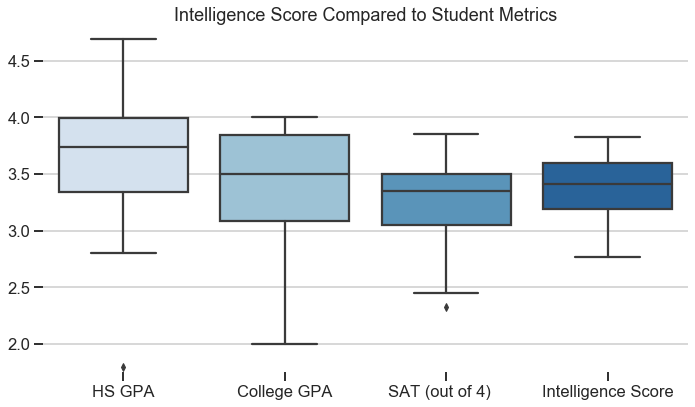

In [18]:
fig, ax = plt.subplots(figsize=figsize)
sns.boxplot(ax=ax, 
            data = [surveydata["hs_gpa"], 
                    surveydata["college_gpa"], 
                    surveydata["converted_sat"] / 400, 
                    surveydata["i_score"]],
            palette = "Blues")

ax.set(ylim=(1.75, 4.8), title="Intelligence Score Compared to Student Metrics")
sns.despine(left=True, bottom=True)

plt.xticks(np.arange(4), ('HS GPA', 'College GPA', 'SAT (out of 4)   ', 'Intelligence Score'))
plt.savefig('Graphs/BplotScores.png')

In [19]:
surveydata.head()

,survey_loc,age,gender,major,major_cat,school,school_year,hs_gpa,college_gpa,sat,converted_sat,act,iq,music_genre,i_score,fav_music_artists,chosen_music_artists,fav_color,fav_comp_color,go_to_bed,avg_sleep_hours,up_from_bed,openness,conscientiousness,extraversion,agreeableness,neuroticism,myers_briggs,social_awkward,social_anxious,show_up_early,cluttered,share_posts_often,num_hobbies,religion,depressed,routine,exercise,diet,limits_social_media,planner,energy_drinks,meditation,cold_showers,coffee,drum_corps,plays_sports,nature_hobby,school_band,indoor_drumline,rick_and_morty,bojack_horseman,blade_runner_(1982),ferris_bueller's_day_off_(1986),catch-22_by_joseph_heller,stranger_things
timestamp,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-02-19 11:20:32.365,Implying Dum corps: electric boogaloo,18.0,Male,Accounting,Business,University,Sophomore,3.34,3.84,1050.0,1050.0,NaN,NaN,Orchestral,3.194316,Electric Light Orchestra,"Radiohead, Beethoven",Orange,Blue,21:30:00,9.500000,07:00:00,4.0,2.0,2.0,3.0,3.0,NaN,1.0,0.0,1.0,0.0,1.0,NaN,NaN,NaN,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0
2020-02-19 11:22:18.391,Implying Dum corps: electric boogaloo,19.0,Male,Aviation,Engineering,University,Sophomore,3.50,3.10,1400.0,1400.0,26.0,132.0,Big band,3.360108,"Benny Goodman, Glenn Miller, Stevie Wonder","Pink Floyd, Chicago, Billy Joel, Beethoven",Blue,Black,01:00:00,8.000000,09:00:00,2.0,1.0,2.0,3.0,1.0,NaN,1.0,0.0,1.0,1.0,0.0,NaN,NaN,NaN,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2020-02-19 11:22:22.283,Implying Dum corps: electric boogaloo,20.0,Male,Economics,Math,University,Sophomore,4.00,3.90,NaN,1370.0,30.0,NaN,Symphonic,3.707242,Youngblood Brass Band,Beethoven,Red,Black,22:00:00,9.000000,07:00:00,3.0,3.0,1.0,2.0,1.0,INTJ,1.0,0.0,1.0,0.0,0.0,NaN,NaN,NaN,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,NaN,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2020-02-19 11:24:48.272,Implying Dum corps: electric boogaloo,19.0,Female,Biology and Environmental science and Policy,Science,University,Sophomore,3.98,3.78,1410.0,1460.0,33.0,NaN,NaN,3.762108,Alternative,"Post Malone, Maroon 5, Rex Orange County, Pink...",Black,Maroon,00:01:00,7.983333,08:00:00,3.0,1.0,2.0,4.0,1.0,INTJ,0.0,1.0,1.0,1.0,0.0,NaN,NaN,NaN,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,NaN,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0
2020-02-19 11:36:03.104,Implying Dum corps: electric boogaloo,19.0,Male,Music Performance,Music,University,Sophomore,3.87,3.84,NaN,1500.0,34.0,141.0,Ska,3.805710,"We Are the Union, Streetlight Manifesto, Badfi...","Frank Zappa, Pink Floyd, Chicago, Radiohead, B...",Red,Blue,00:00:00,9.000000,09:00:00,2.0,4.0,1.0,3.0,2.0,NaN,1.0,0.0,1.0,0.0,1.0,NaN,NaN,NaN,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,NaN,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


Our Intelligence Score formula seems to have calculated an accurate range of values across the dataset. As scores become more challenging to achieve, their range of values shrinks to be closer to the mean as evidenced by the chart.

To allow us to use these `i_score` values in other parts of our analysis, we will create a new datafile to store the `i_score` column by itself. 

In [20]:
from cleaning import export_data
export_data(surveydata['i_score'], fname='i_score_values', ftype='.csv')

The following file has been saved to "C:\Users\denni\OneDrive\Documents\GitHub\FOAS-DESK"
i_score_values.csv



# 3. Personal Interests

In [21]:
surveydata[interests[0]].sample(n=5, random_state=3)

,num_hobbies,music_genre,fav_music_artists,chosen_music_artists,fav_color,fav_comp_color,drum_corps,indoor_drumline,plays_sports,nature_hobby,school_band,religion
timestamp,,,,,,,,,,,,
2020-02-19 14:18:40.425,NaN,alternative,"king princess, mac miller, hozier, mxmtoon, da...","Maroon 5, Rex Orange County, Pink Floyd, Beeth...",green,purple,0.0,0.0,1.0,1.0,1.0,NaN
2020-03-04 16:22:00.966,2.0,Hip-Hop/Rap,"Kendrick Lamar, Tame Impala, The Weeknd, Future",NaN,Blue,Black,0.0,0.0,0.0,0.0,0.0,Christian - Protestant
2020-02-19 13:56:45.531,NaN,indie,"Novo Amor, Jordan Rakei, Jacob Collier","Post Malone, Rex Orange County, Radiohead",yellow,light purple,1.0,0.0,0.0,0.0,1.0,NaN
2020-03-05 14:31:07.318,3.0,Indie/Lo-fi,"Josh Katz, Brendon Urie, Tyler Joseph, Josh Dunn",NaN,Indigo,Navy Blue,0.0,0.0,0.0,0.0,1.0,Christian - Catholic
2020-03-04 12:32:48.779,1.0,Indie/Lo-fi,"Mom Jeans, Starbomb, Ninja Sex Party, McCafferty",NaN,Purple,Yellow,0.0,0.0,0.0,0.0,1.0,Nonreligious


The personal interests section of our data lists personal qualities such as number of hobbies, favorite music genre, favorite colors, and activities of interest. From the graph shown below, we can see that our data is skewed towards people who have participated in a band-related activity. This is due to how the survey data was collected, since more than half of the participants found the survey through a Drum Corps Facebook Page.

In [22]:
round(surveydata['survey_loc'].value_counts()/surveydata.shape[0]*100,2).astype(str)+'%'

Implying Dum corps: electric boogaloo     55.1%
Dennis Farmer's Snapchat                 16.33%
Dennis Farmer's Facebook                 12.24%
Dennis Farmer's Instagram                 8.16%
Other                                     8.16%
Name: survey_loc, dtype: object

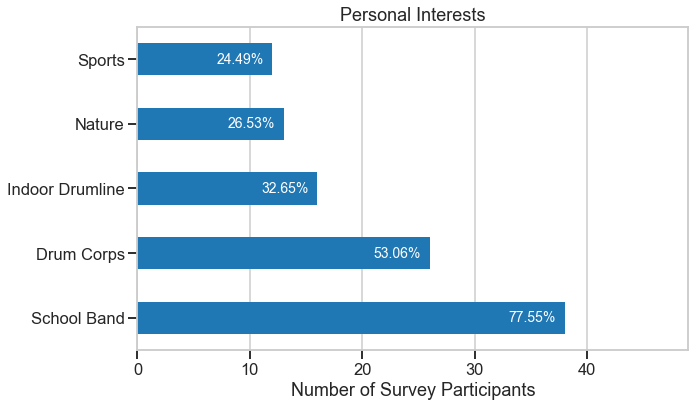

In [23]:
data = surveydata[['drum_corps', 'indoor_drumline', 'plays_sports', 'nature_hobby', 'school_band']].sum().sort_values(ascending=False)
datapct = round(((data/surveydata.shape[0])*100),2)

ax = data.plot(kind='barh', xlim=(0,surveydata.shape[0]), figsize=figsize)

for i, value in enumerate(data.values):
    ax.text(value - 5, i, datapct[i].astype(str)+'%', va='center', color='white', fontsize=14) #fontweight='bold'

ax.set_title("Personal Interests")
ax.set_xlabel("Number of Survey Participants")
plt.yticks(np.arange(5), data.index.str.replace('_',' ').str.title().str.replace('Plays ', '').str.replace(' Hobby',''))
plt.grid(axis="y")
plt.savefig("Graphs/PersonalInterests.png")

In [24]:
data

school_band        38.0
drum_corps         26.0
indoor_drumline    16.0
nature_hobby       13.0
plays_sports       12.0
dtype: float64

## Favorite Music Artists
For analysis of favorite music artists, see `eda_Music_artists.ipynb` (Add link to file on github)

In [25]:
splitdf(surveydata[["fav_color", "fav_comp_color"]], sections=10)

TypeError: split_dataframe() got an unexpected keyword argument 'display_columns'

#### note from documentation (impliment favorite colors?)
https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.DataFrame.plot.html

"If kind = ‘scatter’ and the argument c is the name of a dataframe column, the values of that column are used to color each point."

<br>

https://rdrr.io/cran/gplots/man/col2hex.html

Use R script to create .csv file to insert back into Python DataFrame.

In [ ]:

"""Convert color names to hex values using an api or a json or something else
import os
if not os.path.exists("Color Conversion"):
    os.mkdir("Color Conversion")
os.chdir("Color Conversion")

# clean to remove "and", "for", and "or" from color names. (also adjust "bloo")
# if nan then black?

surveydata[["fav_color","fav_comp_color"]].to_csv("color_names.csv")
"""

In [ ]:
surveydata[interests[1]].sample(n=5, random_state=4)

# 4. Self Improvement

In [ ]:
surveydata[improvement].sample(n=5, random_state=5)

# (((Revise the descriptions for this section)))
The self-improvement section of the dataset contains many questions about the sorts of productive things that the respondents have incorperated into their lives, either throught yes/no questions about the things they do or through the times that they go to bed and wake up from bed. 

## Sleep Analysis
I have already calculated the average amount of sleep that each participant gets every night during the initial data cleaning step, so the next thing to do is to visualize the data to give us insight on how to use it to answer questions we may have.


pg 337 py for data analy

In [ ]:
plt.style.use('ggplot')
go_to_bed = [(t.hour*60) + t.minute if t.day == 1 else (t.hour*60) + t.minute + 1440 for t in time_to_datetime(surveydata["go_to_bed"])]
up_from_bed = [(t.hour*60) + t.minute + 1440 for t in time_to_datetime(surveydata["up_from_bed"])]

min_arange = ((min(go_to_bed)//60)-1)*60
#max_arange = ((max(up_from_bed)//60)+1)*60
max_arange = 2160

fig, ax = plt.subplots(figsize=(14,3))

sns.boxplot(ax=ax, orient="h",
            data = [go_to_bed,
                   up_from_bed],
            palette = "jet_r") # "jet" produces wierd error message
#sns.despine(right=True, left=True, top=True, bottom=True)

#xticks = ax.get_xticks() #ax.xaxis.set_ticks_position('none')

#ax.set(title="Distribution of Sleep Times Among Students")

xticks = []
for t in range(min_arange, max_arange, 60):
    td = (dt.datetime(1970,1,1)+dt.timedelta(minutes=int(t))).hour
    if td < 12:
        td = 12 if td == 0 else td
        xticks.append(f"{td} AM")
    else:
        td = 24 if td == 12 else td
        xticks.append(f"{td-12} PM")

xticks_top = xticks[:9]
xticks_bottom = [""]*(len(xticks_top)-1) + xticks[8:]      

ax.set_xlim(min_arange, max_arange)
ax.set_xticks(np.arange(min_arange, max_arange, 60))
ax.set_xticklabels(xticks_bottom)

ax_top = ax.twiny()
ax_top.set_xlim(min_arange, max_arange)
ax_top.set_xticks(np.arange(min_arange, max_arange, 60))
ax_top.set_xticklabels(xticks_top)


plt.yticks([0,1], ["Bedtime", "Waketime"])
plt.grid(False)

plt.savefig('Graphs/SleepTimes.png')
plt.plot()

It appears that on average, students go to bed at midnight and wake up at around 7:30 AM. Personally I find that I am the most productive when working late at night, so this is likely the case for many other students as well. 

## Night Owls vs Not-Night Owls
We can compare the academics of students who stay up late and students who go to bed earlier than midnight, and see how much of a difference there is.

In [ ]:
bedtime_12_or_later = pd.Series(map(lambda t: True if t >= 1440 else False, go_to_bed))
bedtime_earlier_12 = ~bedtime_12_or_later

In [ ]:
print("Bed after midnight average: ",round(get_avg_i_scores(surveydata.reset_index(drop=True), pd.DataFrame(bedtime_12_or_later))[0],2))
print("Bed before midnight average:",round(get_avg_i_scores(surveydata.reset_index(drop=True), pd.DataFrame(~bedtime_12_or_later))[0],2))

#sns.barplot(ax=ax,data=[get_avg_i_score], x='avg_i_equalized', y='artist_name', palette=palette)

According to our data, going to bed before midnight likely means that your grades are slightly higher than if you were to go to bed at midnight or later. I would not rate this difference as being statistically significant in the slightest, but it is an interesting insight nonetheless.

In [ ]:
surveydata[['i_score', 'avg_sleep_hours']].corr(method='pearson').iloc[0,1]

In [ ]:
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=figsize)
sns.scatterplot(ax=ax, 
                data=surveydata[['i_score', 'avg_sleep_hours']], 
                x='i_score', 
                y='avg_sleep_hours', 
                palette = "magma", 
                hue='avg_sleep_hours',
                size="i_score", 
                legend=False)

sns.despine(right=True, left=True, top=True, bottom=True)

ax.set(xlabel="Weighted Mean of HS GPA, College GPA, and SAT Score", 
       ylabel="Hours of Sleep", 
       title="No Correlation between Amount of Sleep and Academic Success")
#plt.grid(False)

plt.grid(color="#D3D3D3", linestyle=':', linewidth=2)
plt.show()

## Correlation Matrix of Various Self-Improvement Methods

In [ ]:
surveydata[improvement].sample(n=5, random_state=5)

In [ ]:
data = surveydata[['routine','exercise','diet','limits_social_media', 'planner', 'energy_drinks','meditation', 'cold_showers', 'coffee', 'i_score']].corr()

fig, ax = plt.subplots(figsize=(25,12))
mask = np.zeros(data.shape, dtype=bool)
mask[np.triu_indices(len(mask))] = True
sns.heatmap(data, ax=ax, vmin = -.6, vmax = .6, center = 0, cmap = 'YlGnBu', annot = True, annot_kws={"size": 20}, mask = mask) #magma

plt.show()

# 5. Personality Questions

In [ ]:
surveydata[personality[0]].sample(n=5, random_state=6)

In [ ]:
surveydata[personality[1]].sample(n=5, random_state=7)